In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('training.csv')

In [3]:
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:
data.shape

(95662, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 11.7+ MB


In [6]:
data.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

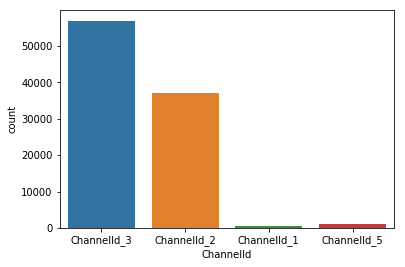

In [36]:
sns.countplot(x='ChannelId', data=data);

In [37]:
# the diffrent value of pay schedule
data['ChannelId'].unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5'],
      dtype=object)

In [10]:
testData = pd.read_csv('test.csv')

In [12]:
testData['FraudResult'] = 0

In [14]:
testData.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [17]:
result = testData.drop(['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy'] , axis = 1)

In [18]:
result.head()

,TransactionId,FraudResult
0,TransactionId_50600,0
1,TransactionId_95109,0
2,TransactionId_47357,0
3,TransactionId_28185,0
4,TransactionId_22140,0


In [19]:
result.to_csv('first_submition.csv', index = False)

### Visualizing Test data

In [53]:
def print_unique(column):
    print("----------{}----------".format(column))
    print(testData[column].unique())
    print(data[column].unique())
    print("data => {} , test => {}".format(len(data[column].unique()), len(testData[column].unique())))

In [54]:
# the diffrent value of pay schedule
print_unique('ProductId')

----------ProductId----------
['ProductId_3' 'ProductId_15' 'ProductId_6' 'ProductId_10' 'ProductId_14'
 'ProductId_1' 'ProductId_7' 'ProductId_4' 'ProductId_21' 'ProductId_8'
 'ProductId_11' 'ProductId_19' 'ProductId_13' 'ProductId_24'
 'ProductId_22' 'ProductId_20' 'ProductId_27' 'ProductId_2' 'ProductId_9'
 'ProductId_26' 'ProductId_5' 'ProductId_25' 'ProductId_18' 'ProductId_17'
 'ProductId_16' 'ProductId_23']
['ProductId_10' 'ProductId_6' 'ProductId_1' 'ProductId_21' 'ProductId_3'
 'ProductId_15' 'ProductId_11' 'ProductId_19' 'ProductId_4' 'ProductId_5'
 'ProductId_20' 'ProductId_9' 'ProductId_24' 'ProductId_14' 'ProductId_2'
 'ProductId_13' 'ProductId_22' 'ProductId_8' 'ProductId_7' 'ProductId_27'
 'ProductId_12' 'ProductId_16' 'ProductId_23']
data => 23 , test => 26


In [56]:
for i in testData.columns:
    print_unique(i)

----------TransactionId----------
['TransactionId_50600' 'TransactionId_95109' 'TransactionId_47357' ...
 'TransactionId_102920' 'TransactionId_128439' 'TransactionId_45927']
['TransactionId_76871' 'TransactionId_73770' 'TransactionId_26203' ...
 'TransactionId_82501' 'TransactionId_136354' 'TransactionId_35670']
data => 95662 , test => 45019
----------BatchId----------
['BatchId_35028' 'BatchId_45139' 'BatchId_74887' ... 'BatchId_112209'
 'BatchId_58734' 'BatchId_98308']
['BatchId_36123' 'BatchId_15642' 'BatchId_53941' ... 'BatchId_118602'
 'BatchId_70924' 'BatchId_29317']
data => 94809 , test => 44684
----------AccountId----------
['AccountId_2441' 'AccountId_3439' 'AccountId_4841' ... 'AccountId_4297'
 'AccountId_804' 'AccountId_3408']
['AccountId_3957' 'AccountId_4841' 'AccountId_4229' ... 'AccountId_557'
 'AccountId_2476' 'AccountId_1685']
data => 3633 , test => 2471
----------SubscriptionId----------
['SubscriptionId_4426' 'SubscriptionId_2643' 'SubscriptionId_3829' ...
 'Subscri

[  1000     20    500 ...     47 235000   5890]
data => 1517 , test => 944
----------TransactionStartTime----------
['2019-02-13T10:01:40Z' '2019-02-13T10:02:12Z' '2019-02-13T10:02:30Z' ...
 '2019-03-14T23:59:17Z' '2019-03-14T23:59:39Z' '2019-03-14T23:59:51Z']
['2018-11-15T02:18:49Z' '2018-11-15T02:19:08Z' '2018-11-15T02:44:21Z' ...
 '2019-02-13T09:54:35Z' '2019-02-13T10:01:10Z' '2019-02-13T10:01:28Z']
data => 94556 , test => 44018
----------PricingStrategy----------
[4 2 1 0]
[2 4 1 0]
data => 4 , test => 4
----------FraudResult----------
[0]
[0 1]
data => 2 , test => 1


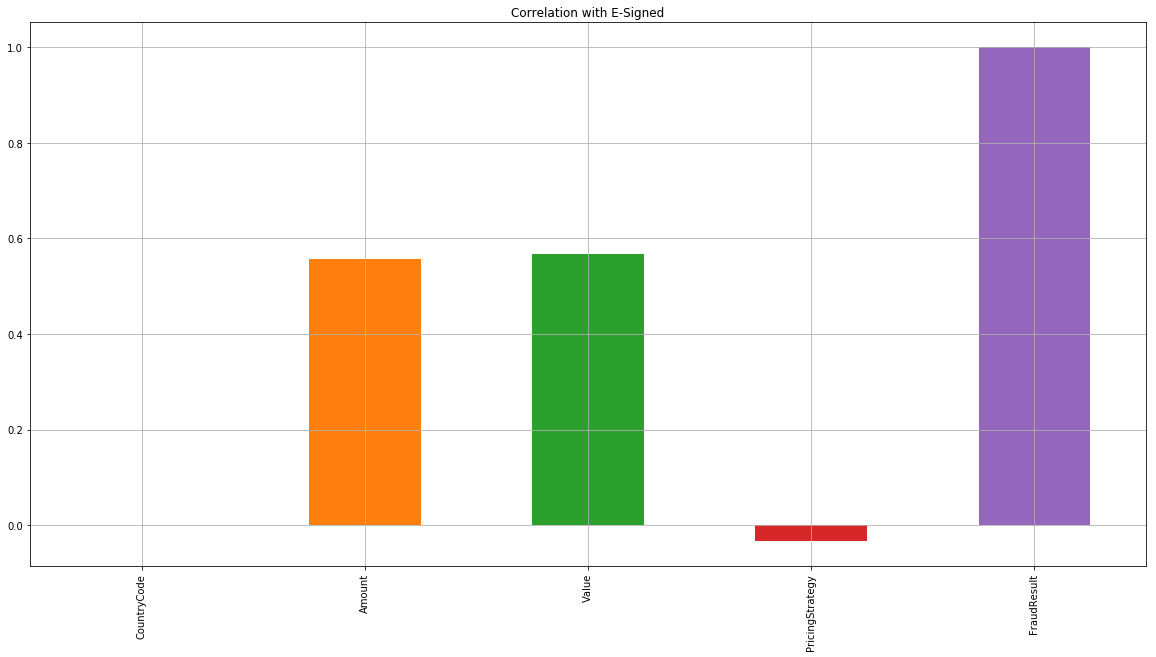

In [84]:
data.corrwith(data.FraudResult).plot.bar(figsize = (20,10), grid = True, title = 'Correlation with E-Signed')

In [81]:
data.FraudResult.value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

## Preparing the data

In [68]:
data_c = data.copy()

In [69]:
data_c = data_c.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'TransactionStartTime'], axis = 1)

In [70]:
data_c.head()

,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,PricingStrategy,FraudResult
0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2,0
1,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2,0
2,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2,0
3,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2,0
4,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2,0


In [71]:
data_c.to_csv('first_iter.csv', index = False)

In [92]:
X = data_c.iloc[:, data_c.columns != 'FraudResult']
y = data_c.iloc[:, data_c.columns == 'FraudResult']

In [83]:
X = pd.get_dummies(X)

In [93]:
X = X.drop(['ProviderId', 'ProductId', 'ProductCategory', 'ChannelId','PricingStrategy'], axis = 1)

In [95]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 22)

In [96]:
# Standerdise the dataset
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

C:\Users\mxcsy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mxcsy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\mxcsy\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mxcsy\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [109]:
# building first model
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver = 'lbfgs')
clf_lr.fit(x_train, y_train)

C:\Users\mxcsy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [110]:
# making evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
def evaluate(clf):
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("The Scores for {} are: Accuracy of {}, F1 of {} and CM".format(type(clf).__name__, accuracy, f1))
    sns.heatmap(cm, annot = True , fmt='g')

The Scores for LogisticRegression are: Accuracy of 0.9980835569183595, F1 of 0.4086021505376344 and CM


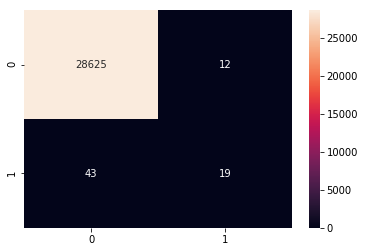

In [111]:
evaluate(clf_lr)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(100)
clf_knn.fit(x_train, y_train)

C:\Users\mxcsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

The Scores for KNeighborsClassifier are: Accuracy of 0.99926826718701, F1 of 0.8346456692913387 and CM


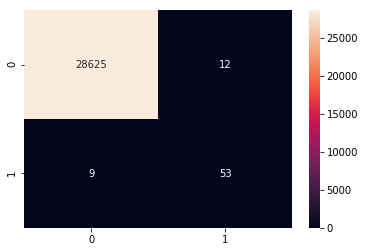

In [113]:
evaluate(clf_knn)

In [114]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

The Scores for DecisionTreeClassifier are: Accuracy of 0.9994773337050071, F1 of 0.8648648648648648 and CM


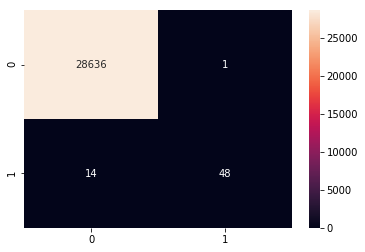

In [115]:
evaluate(clf_dt)

In [116]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)

C:\Users\mxcsy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mxcsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

The Scores for RandomForestClassifier are: Accuracy of 0.9994773337050071, F1 of 0.8648648648648648 and CM


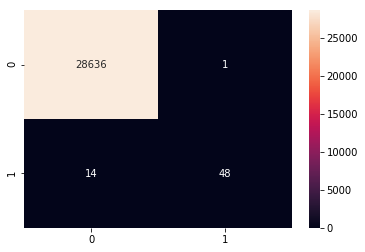

In [117]:
evaluate(clf_rf)

# Predict the result

In [121]:
subData = testData.drop(['FraudResult','TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'TransactionStartTime','ProviderId', 'ProductId', 'ProductCategory', 'ChannelId','PricingStrategy'], axis = 1)

In [122]:
subData = scaler.transform(subData)

C:\Users\mxcsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [123]:
subData

array([[-0.0451048 , -0.07264214],
       [-0.03670801, -0.06423185],
       [-0.05392143, -0.0806319 ],
       ...,
       [ 0.0304663 ,  0.0030504 ],
       [-0.09548554, -0.03900101],
       [-0.02411283, -0.05161643]])

In [133]:
ids = testData.TransactionId

In [124]:
predictionknn = clf_knn.predict(subData)

In [125]:
predictiondt = clf_dt.predict(subData)

In [126]:
predictionrf = clf_rf.predict(subData)

In [138]:
def get_submission(data, clf, name):
    prediction = clf.predict(data)
    all_data = list(zip(ids, prediction))
    final_result = pd.DataFrame(all_data, columns=['TransactionId', 'FraudResult'])
    final_result.to_csv(name, index =False)
    final_result.head()
    return final_result

In [143]:
r = get_submission(subData, clf_dt, 'dt.csv')

In [144]:
r.FraudResult.value_counts()

0    44954
1       65
Name: FraudResult, dtype: int64